## 411 Assignment #2
Author: Andrew Knight

In [1]:
#imports
import pandas as pd      
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import statsmodels as sm
import statsmodels.formula.api as smf  # R-like model specification
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn import linear_model, metrics

In [2]:
#Set some basic display items
get_ipython().magic(u'matplotlib inline')

#Set some display options   
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 120)

In [6]:
#Read in the auto ins dataset
train = pd.read_csv('train_auto.csv')
test = pd.read_csv('test_auto.csv')
#A good step to take is to convert all variable names to lower case
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in train.columns]
train.head()
#train.shape

   index  target_flag  target_amt  kidsdriv   age  homekids   yoj    income parent1  home_val mstatus  sex  \
0      1            0         0.0         0  60.0         0  11.0   $67,349      No        $0    z_No    M   
1      2            0         0.0         0  43.0         0  11.0   $91,449      No  $257,252    z_No    M   
2      4            0         0.0         0  35.0         1  10.0   $16,039      No  $124,191     Yes  z_F   
3      5            0         0.0         0  51.0         0  14.0       NaN      No  $306,251     Yes    M   
4      6            0         0.0         0  50.0         0   NaN  $114,986      No  $243,925     Yes  z_F   

       education            job  travtime     car_use bluebook  tif car_type red_car oldclaim  clm_freq revoked  \
0            PhD   Professional        14     Private  $14,230   11  Minivan     yes   $4,461         2      No   
1  z_High School  z_Blue Collar        22  Commercial  $14,940    1  Minivan     yes       $0         0      

In [5]:
print('')
print('----- Summary of Input Data -----')
print('')

# show the object is a DataFrame
print('Object type: ', type(train))

# show number of observations in the DataFrame
print('Number of observations: ', len(train))

# show variable names
print('Variable names: ', train.columns)

# show descriptive statistics
#print(train.describe())
#watch the count it will tell you if a variable has some missing values that you will need to deal with
train=train.fillna(0)

print('\n---------------- TRAINING DATA ------------------\n')
m = np.median(train.car_age[train.car_age>0])
train1=train.replace({'car_age': {0: m}}) 
print(train1.describe())

#Make sure whatever you do to the training data you also do to the test data otherwise your model will not score properly
print('\n---------------- TESTING DATA ------------------\n')
test=test.fillna(0)
test1=test.replace({'car_age': {0: m}})
print(test1.describe())


----- Summary of Input Data -----

Object type:  <class 'pandas.core.frame.DataFrame'>
Number of observations:  8161
Variable names:  Index(['index', 'target_flag', 'target_amt', 'kidsdriv', 'age', 'homekids', 'yoj', 'income', 'parent1', 'home_val',
       'mstatus', 'sex', 'education', 'job', 'travtime', 'car_use', 'bluebook', 'tif', 'car_type', 'red_car',
       'oldclaim', 'clm_freq', 'revoked', 'mvr_pts', 'car_age', 'urbanicity'],
      dtype='object')

---------------- TRAINING DATA ------------------

              index  target_flag     target_amt     kidsdriv          age     homekids          yoj     travtime  \
count   8161.000000  8161.000000    8161.000000  8161.000000  8161.000000  8161.000000  8161.000000  8161.000000   
mean    5151.867663     0.263816    1504.324648     0.171057    44.757383     0.721235     9.915206    33.485725   
std     2978.893962     0.440728    4704.026930     0.511534     8.709455     1.116323     4.648494    15.908333   
min        1.000000   

In [22]:
#Example for a simple model
logit1 = smf.logit('target_flag ~  education + mstatus + tif + kidsdriv + mvr_pts' , data=train1)  
result = logit1.fit()  
print (result.summary())
print (result.conf_int())
#dir(logit1)

Optimization terminated successfully.
         Current function value: 0.528299
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            target_flag   No. Observations:                 8161
Model:                          Logit   Df Residuals:                     8152
Method:                           MLE   Df Model:                            8
Date:                Tue, 24 Jul 2018   Pseudo R-squ.:                 0.08442
Time:                        13:12:45   Log-Likelihood:                -4311.5
converged:                       True   LL-Null:                       -4709.0
                                        LLR p-value:                2.388e-166
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.2684      0.081    -15.656      0.000      

In [9]:
#use this model to predict for the test data
preds = result.predict(test1)
preds.head
pred_out = test1.loc[:,['index','target_flag']]
pred_out['p_target_flag'] = preds[: ]
pred_out.head

<bound method NDFrame.head of       index  target_flag  p_target_flag
0         3          0.0       0.331914
1         9          0.0       0.509469
2        10          0.0       0.279196
3        18          0.0       0.318854
4        21          0.0       0.575099
...     ...          ...            ...
2136  10279          0.0       0.305975
2137  10281          0.0       0.292517
2138  10285          0.0       0.085114
2139  10294          0.0       0.214087
2140  10300          0.0       0.168001

[2141 rows x 3 columns]>

In [10]:
# Crash data where target_amt > 0
train1.shape
train_crash = train1[train1['target_amt'] != 0]
train_crash.shape
train_crash.head
#It is OK to use the mean for target_amt 5702
# or you can use ols model to predict target_amt
small = train_crash.loc[:,['index','target_amt']]
print(small.describe())
pred_out['p_target_amt'] = 5702
pred_out.head

              index     target_amt
count   2153.000000    2153.000000
mean    5143.559684    5702.179960
std     2958.808298    7743.182975
min        7.000000      30.277280
25%     2559.000000    2609.778566
50%     5170.000000    4104.000000
75%     7645.000000    5787.000000
max    10288.000000  107586.136160


<bound method NDFrame.head of       index  target_flag  p_target_flag  p_target_amt
0         3          0.0       0.331914          5702
1         9          0.0       0.509469          5702
2        10          0.0       0.279196          5702
3        18          0.0       0.318854          5702
4        21          0.0       0.575099          5702
...     ...          ...            ...           ...
2136  10279          0.0       0.305975          5702
2137  10281          0.0       0.292517          5702
2138  10285          0.0       0.085114          5702
2139  10294          0.0       0.214087          5702
2140  10300          0.0       0.168001          5702

[2141 rows x 4 columns]>

In [12]:
# Output predictions file
#watch your record count should be 2141
your_model = pred_out.loc[:,['index','p_target_flag','p_target_amt']]  
your_model.head 
your_model.to_csv('example_hw02_predictions.csv', index = False)

In [16]:
#Some additional code for a reduced model to create the ROC curve and calculate AUC
# import pandas as pd
# import statsmodels as sm
# from sklearn import linear_model, metrics
 
train1['constant'] = 1
X = train1[['tif','kidsdriv','mvr_pts','constant']].copy()
y = train1[['target_flag']].copy()
#  a different look logistic regression model
logit = sm.Logit(train1['target_flag'], train1[['tif','kidsdriv','mvr_pts','constant']])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.547463
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            target_flag   No. Observations:                 8161
Model:                          Logit   Df Residuals:                     8157
Method:                           MLE   Df Model:                            3
Date:                Tue, 24 Jul 2018   Pseudo R-squ.:                 0.05121
Time:                        12:44:15   Log-Likelihood:                -4467.8
converged:                       True   LL-Null:                       -4709.0
                                        LLR p-value:                3.317e-104
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tif           -0.0447      0.007     -6.822      0.000      -0.058      -0.032
kidsdriv       0.3804      0.046      8.208      0.000       0.290       0.471
mvr_pts        0.2102      0.011     18.466      0.000       0.188       0.233
constant      -1.2674      0.049    -26.005      0.000      -1.363      -1.172
==============================================================================
"""

0.646128315984


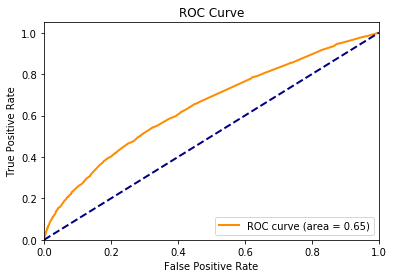

In [18]:
# sklearn model  to calculate AUC / create ROC curve
logit = linear_model.LogisticRegression()
model = logit.fit(train1[['tif','kidsdriv','mvr_pts','constant']], train1['target_flag'])

# calculate the predicted probabilities
preds = model.predict_proba(train1[['tif','kidsdriv','mvr_pts','constant']])[:,1]
fpr, tpr, _ = metrics.roc_curve(train1['target_flag'], preds)
 
# calculate AUC and create ROC curve
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
#Finally for the Hosmer-Lemeshow Lack of Fit
pred_train = result.predict(X)
pred_train.head
pred_out = train1.loc[:,['index','target_flag']]
pred_out['p_target_flag'] = pred_train[: ]
pred_out.head 
#sort by pred
result1 = pred_out.sort_values(by=('p_target_flag'))
print (result1)

#rank by decile
result2 = pd.qcut(result1['p_target_flag'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
print (result2)
d1 = {'g' : result2}
df3 = pd.DataFrame(data=d1)
print (df3)
result3 = pd.concat([result1, df3], axis=1, join_axes=[result1.index])
print (result3)

sums = result3.groupby('g')
sums1 = sums.aggregate(np.sum)
print (sums1)

      index  target_flag  p_target_flag
4982   6282            0       0.084278
1297   1632            0       0.084278
4642   5859            0       0.095228
5120   6465            0       0.099152
7306   9235            1       0.099152
...     ...          ...            ...
7831   9886            1       0.805397
5821   7350            1       0.830149
7819   9869            1       0.848241
5464   6910            1       0.848241
3772   4747            0       0.891028

[8161 rows x 3 columns]
4982     1
1297     1
4642     1
5120     1
7306     1
        ..
7831    10
5821    10
7819    10
5464    10
3772    10
Name: p_target_flag, Length: 8161, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]
       g
4982   1
1297   1
4642   1
5120   1
7306   1
...   ..
7831  10
5821  10
7819  10
5464  10
3772  10

[8161 rows x 1 columns]
      index  target_flag  p_target_flag   g
4982   6282            0       0.084278   1
1297   1632            0       0.084278   1

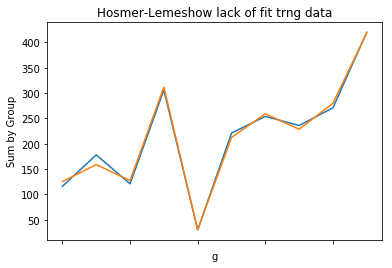

In [20]:
#plot target_flag vs pred
def scat(dataframe,var1,var2,var3):     
    dataframe[var2].plot()     
    dataframe[var3].plot()     
    plt.title('Hosmer-Lemeshow lack of fit trng data')     
    plt.xlabel(var1)     
    plt.ylabel('Sum by Group')
scat(sums1, 'g', 'target_flag', 'p_target_flag')

# #save as jpeg to place in your report
# plt.savefig('c:/data/HLlackoffit2.jpeg')